INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/38xaarjr.json



Forecasting for 1 months...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/cl_3lheg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8533', 'data', 'file=/tmp/tmpz3k2j_dc/38xaarjr.json', 'init=/tmp/tmpz3k2j_dc/cl_3lheg.json', 'output', 'file=/tmp/tmpz3k2j_dc/prophet_models5nh21my/prophet_model-20241129181737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


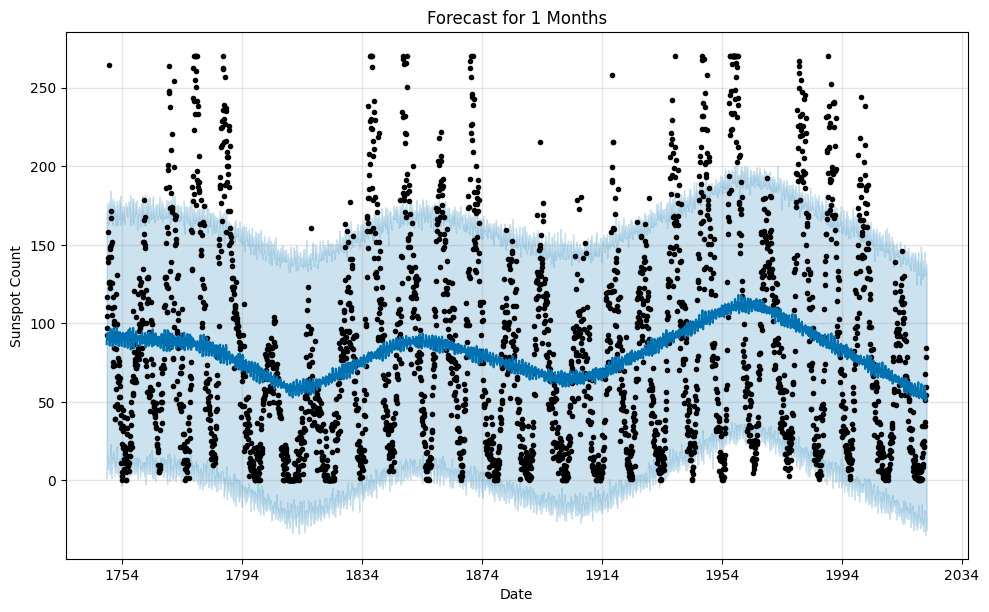

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/23twmbri.json


Forecasted Values for 1 Months:
             ds       yhat
3280 2022-04-30  51.209461
Evaluation Metrics for 1 Months: {'MAE': 52.28669128493235, 'SMAPE': 74.39229340486156, 'R²': 0.09194847403107831}

Forecasting for 6 months...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/gby12qjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46054', 'data', 'file=/tmp/tmpz3k2j_dc/23twmbri.json', 'init=/tmp/tmpz3k2j_dc/gby12qjt.json', 'output', 'file=/tmp/tmpz3k2j_dc/prophet_model89l71gz4/prophet_model-20241129181741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


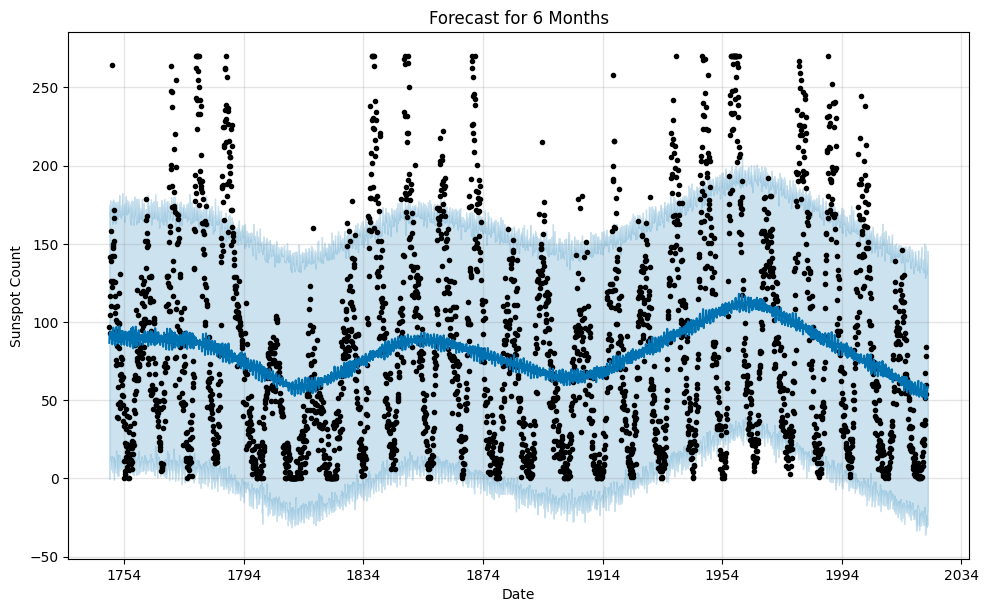

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/ckgi913o.json


Forecasted Values for 6 Months:
             ds       yhat
3280 2022-04-30  51.209461
3281 2022-05-31  52.951190
3282 2022-06-30  55.773896
3283 2022-07-31  58.603751
3284 2022-08-31  58.059805
3285 2022-09-30  58.127761
Evaluation Metrics for 6 Months: {'MAE': 52.28669128493235, 'SMAPE': 74.39229340486156, 'R²': 0.09194847403107831}

Forecasting for 9 months...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3k2j_dc/h4i9qa6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57647', 'data', 'file=/tmp/tmpz3k2j_dc/ckgi913o.json', 'init=/tmp/tmpz3k2j_dc/h4i9qa6t.json', 'output', 'file=/tmp/tmpz3k2j_dc/prophet_model2odv3j1l/prophet_model-20241129181744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


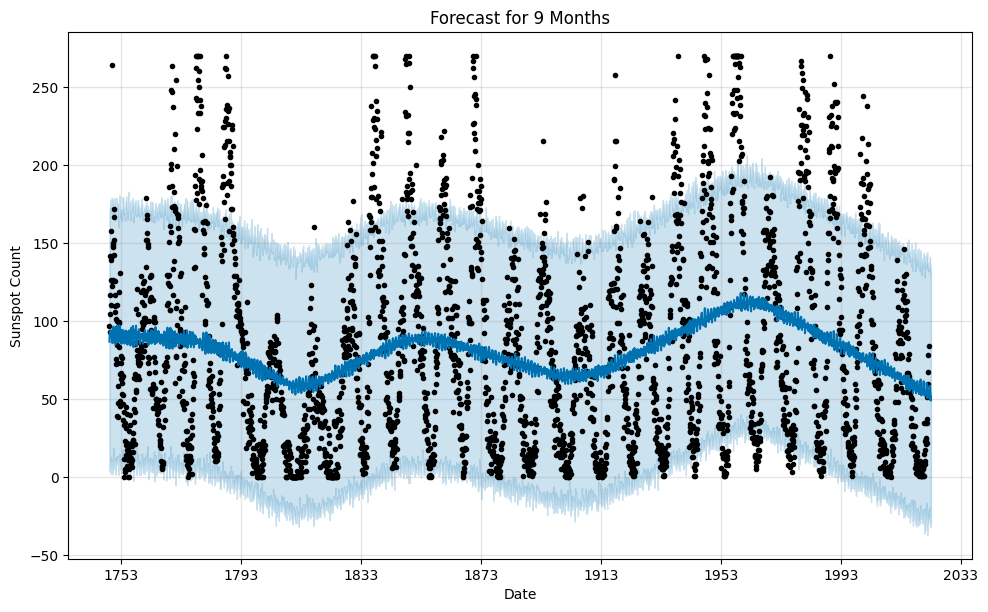

Forecasted Values for 9 Months:
             ds       yhat
3280 2022-04-30  51.209461
3281 2022-05-31  52.951190
3282 2022-06-30  55.773896
3283 2022-07-31  58.603751
3284 2022-08-31  58.059805
3285 2022-09-30  58.127761
3286 2022-10-31  49.147704
3287 2022-11-30  51.848371
3288 2022-12-31  49.104260
Evaluation Metrics for 9 Months: {'MAE': 52.28669128493235, 'SMAPE': 74.39229340486156, 'R²': 0.09194847403107831}


In [15]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Preprocess the dataset
def preprocess_monthly_data(df):
    """
    Cleans and prepares the monthly sunspot dataset for time series modeling.
    """
    df['ds'] = pd.to_datetime(df[0].astype(str) + '-' + df[1].astype(str) + '-01', errors='coerce')  # Create datetime column
    df['y'] = pd.to_numeric(df[3], errors='coerce')  # Ensure the target column is numeric
    df = df[['ds', 'y']].dropna()  # Keep only necessary columns and drop rows with NaN
    return df

# Step 2: Handle outliers
def handle_outliers(data):
    """
    Clips extreme outliers to reduce skewed values and stabilize predictions.
    """
    q1 = data['y'].quantile(0.25)
    q3 = data['y'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data['y'] = data['y'].clip(lower_bound, upper_bound)
    return data

# Step 3: Build the model and forecast
def build_forecast_model(data, forecast_periods):
    """
    Builds and forecasts a Prophet model using the monthly dataset.
    """
    # Initialize and tune Prophet model
    model = Prophet(
        growth="linear",  # Define the growth type
        changepoint_prior_scale=0.1,  # Adjust sensitivity to trend changes
        seasonality_prior_scale=5.0  # Reduce overfitting to seasonality
    )
    # Add custom seasonality (11-year solar cycle as an example)
    model.add_seasonality(name='11_year_cycle', period=132, fourier_order=5)  # 11 years * 12 months = 132 months
    model.fit(data)

    # Create future dataframe and forecast
    future = model.make_future_dataframe(periods=forecast_periods, freq='M')
    forecast = model.predict(future)
    return model, forecast

# Step 4: Evaluate the model
def evaluate_model(y_true, y_pred):
    """
    Evaluates the model using MAE, SMAPE, and R² metrics.
    """
    epsilon = 1e-5  # Small constant to avoid division by zero
    y_true = np.where(y_true < epsilon, epsilon, y_true)
    y_pred = np.where(y_pred < epsilon, epsilon, y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "SMAPE": smape, "R²": r2}

# Step 5: Forecast for 1, 6, and 9 months
def forecast_and_evaluate(data, horizons):
    """
    Forecasts for specified horizons and evaluates the results.
    """
    results = {}
    for horizon in horizons:
        print(f"\nForecasting for {horizon} months...")

        # Build the model and forecast
        model, forecast = build_forecast_model(data, horizon)

        # Plot the forecast
        model.plot(forecast)
        plt.title(f"Forecast for {horizon} Months")
        plt.xlabel("Date")
        plt.ylabel("Sunspot Count")
        plt.show()

        # Extract future predictions
        future_predictions = forecast[['ds', 'yhat']].tail(horizon)
        print(f"Forecasted Values for {horizon} Months:")
        print(future_predictions)

        # Evaluate model on historical data
        evaluation = evaluate_model(data['y'], forecast['yhat'][:len(data)])
        results[horizon] = {"Evaluation Metrics": evaluation, "Forecast": future_predictions}
        print(f"Evaluation Metrics for {horizon} Months: {evaluation}")

    return results

# Main code execution
file_path = 'SN_m_tot_V2.0.csv'  # Replace with your file path
df = pd.read_csv(file_path, delimiter=';', header=None)

# Preprocess the data
data = preprocess_monthly_data(df)
data = handle_outliers(data)

# Define forecast horizons
horizons = [1, 6, 9]  # Forecast for 1, 6, and 9 months

# Perform forecasting and evaluation
forecast_results = forecast_and_evaluate(data, horizons)
